In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
x=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [10]:
train_data= x_train.join(y_train)

In [11]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17999,-121.97,37.28,27.0,2427.0,403.0,1301.0,438.0,5.0385,<1H OCEAN,277300.0
7820,-118.11,33.91,36.0,1088.0,231.0,617.0,211.0,3.8824,<1H OCEAN,193100.0
1899,-120.01,38.89,24.0,1669.0,422.0,589.0,281.0,3.0089,INLAND,100800.0
10289,-117.83,33.88,18.0,2112.0,340.0,1048.0,315.0,6.9308,<1H OCEAN,231700.0
18888,-122.24,38.11,42.0,1743.0,388.0,889.0,341.0,2.3241,NEAR BAY,99200.0
...,...,...,...,...,...,...,...,...,...,...
13345,-117.64,34.05,27.0,1407.0,362.0,1684.0,350.0,2.1944,INLAND,95700.0
14701,-117.07,32.80,36.0,2028.0,349.0,820.0,352.0,3.9828,<1H OCEAN,168900.0
12504,-121.44,38.56,45.0,2423.0,466.0,873.0,438.0,3.7167,INLAND,131900.0
6365,-117.97,34.17,35.0,5005.0,848.0,2112.0,813.0,4.9968,INLAND,295000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

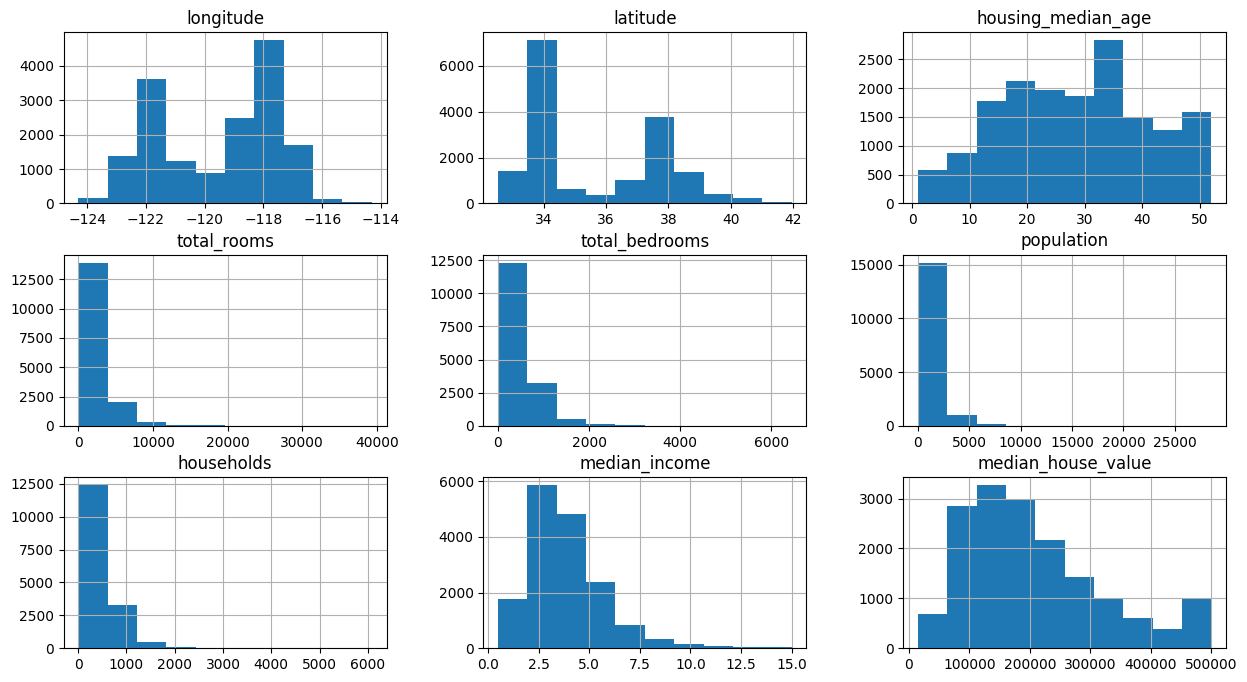

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data.corr(numeric_only=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924745,-0.111389,0.042865,0.065677,0.097843,0.052216,-0.013604,-0.046354
latitude,-0.924745,1.000000,0.014887,-0.035490,-0.063936,-0.108571,-0.068691,-0.081281,-0.141988
housing_median_age,-0.111389,0.014887,1.000000,-0.359953,-0.318459,-0.297967,-0.300218,-0.114817,0.105687
total_rooms,0.042865,-0.035490,-0.359953,1.000000,0.929429,0.862920,0.917801,0.198767,0.134088
total_bedrooms,0.065677,-0.063936,-0.318459,0.929429,1.000000,0.881955,0.979135,-0.009322,0.047618
population,0.097843,-0.108571,-0.297967,0.862920,0.881955,1.000000,0.911771,0.004779,-0.025460
households,0.052216,-0.068691,-0.300218,0.917801,0.979135,0.911771,1.000000,0.012791,0.063794
median_income,-0.013604,-0.081281,-0.114817,0.198767,-0.009322,0.004779,0.012791,1.000000,0.691026
median_house_value,-0.046354,-0.141988,0.105687,0.134088,0.047618,-0.025460,0.063794,0.691026,1.000000


<Axes: >

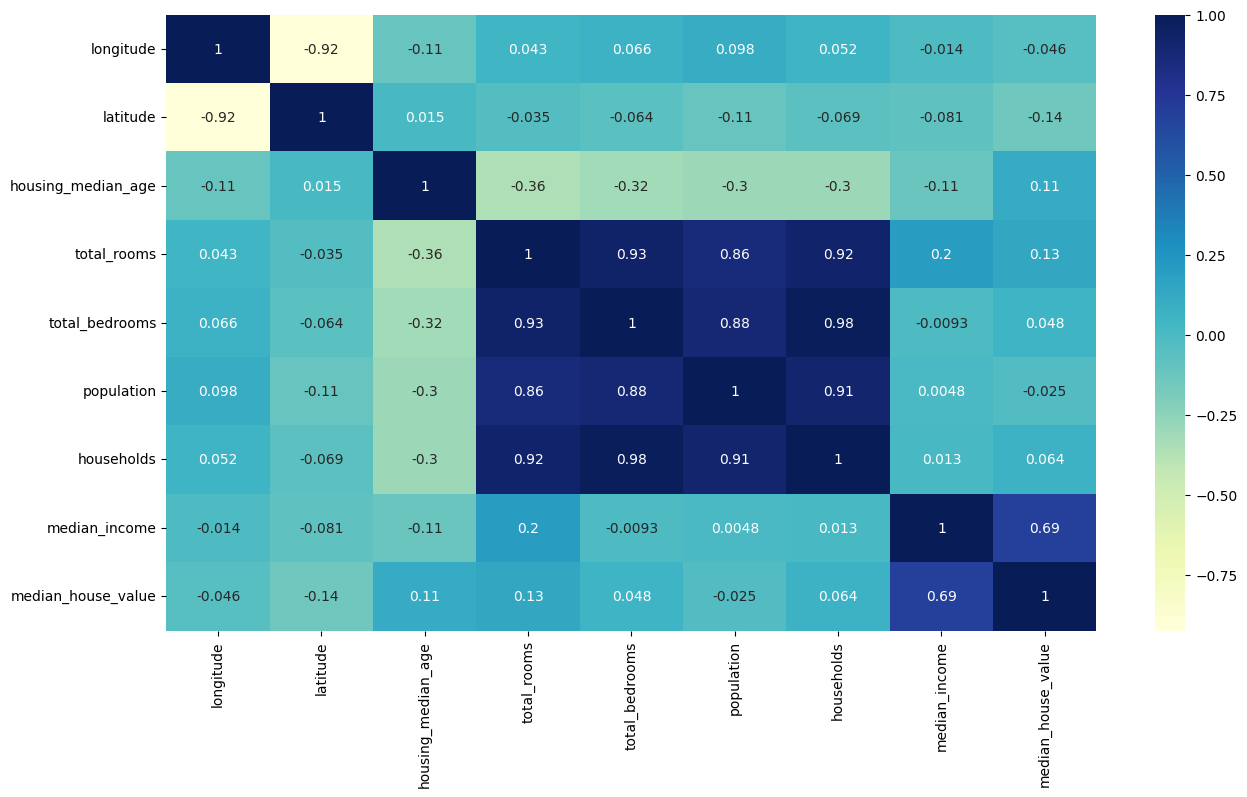

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [15]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+ 1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+ 1)
train_data["population"]=np.log(train_data["population"]+ 1)
train_data["households"]=np.log(train_data["households"]+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

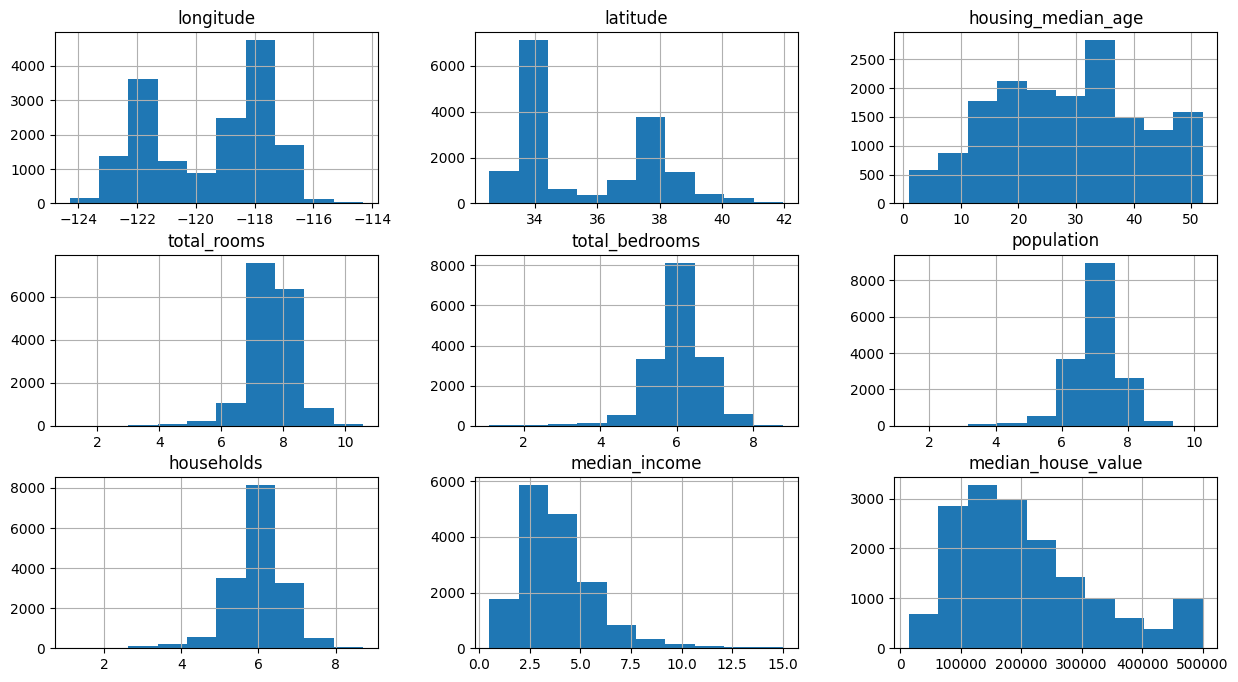

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(["ocean_proximity"], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17999,-121.97,37.28,27.0,7.794823,6.001415,7.171657,6.084499,5.0385,277300.0,1,0,0,0,0
7820,-118.11,33.91,36.0,6.993015,5.446737,6.426488,5.356586,3.8824,193100.0,1,0,0,0,0
1899,-120.01,38.89,24.0,7.420579,6.047372,6.380123,5.641907,3.0089,100800.0,0,1,0,0,0
10289,-117.83,33.88,18.0,7.655864,5.831882,6.955593,5.755742,6.9308,231700.0,1,0,0,0,0
18888,-122.24,38.11,42.0,7.463937,5.963579,6.791221,5.834811,2.3241,99200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,-117.64,34.05,27.0,7.249926,5.894403,7.429521,5.860786,2.1944,95700.0,0,1,0,0,0
14701,-117.07,32.80,36.0,7.615298,5.857933,6.710523,5.866468,3.9828,168900.0,1,0,0,0,0
12504,-121.44,38.56,45.0,7.793174,6.146329,6.773080,6.084499,3.7167,131900.0,0,1,0,0,0
6365,-117.97,34.17,35.0,8.518392,6.744059,7.655864,6.701960,4.9968,295000.0,0,1,0,0,0


<Axes: >

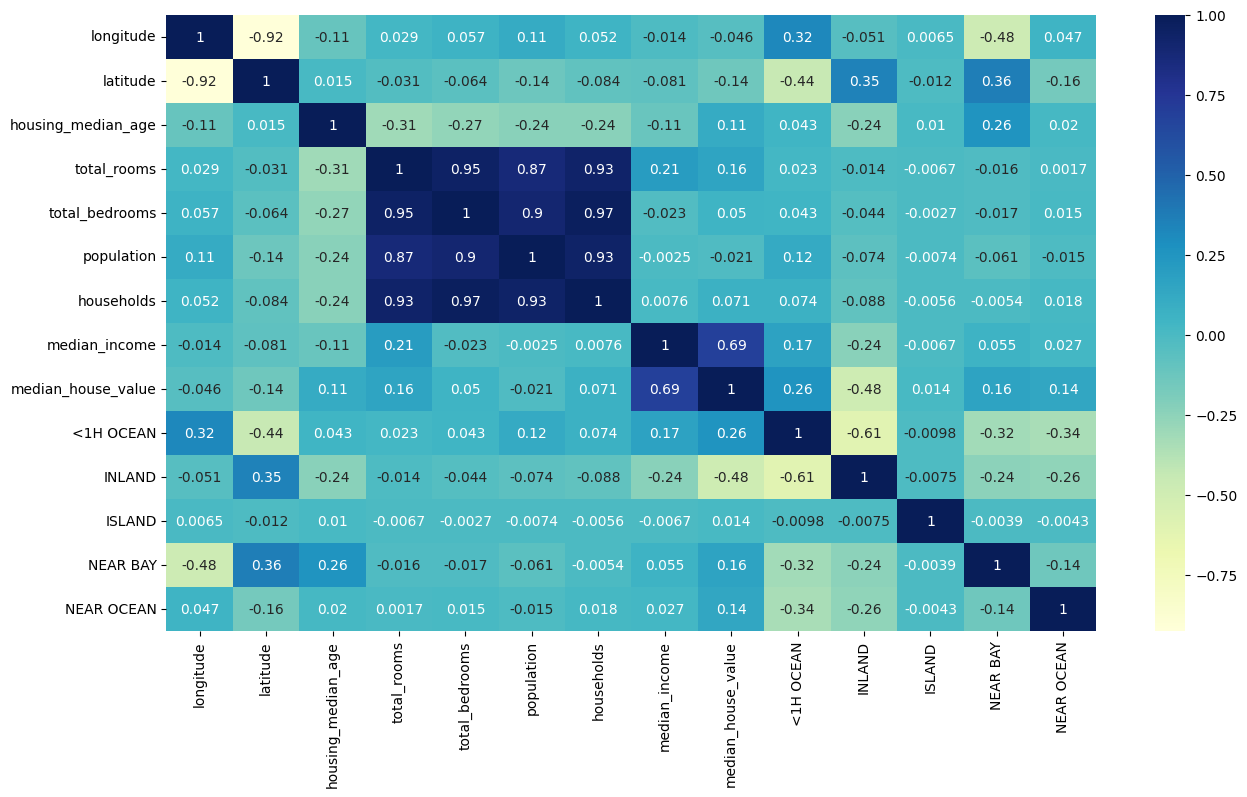

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

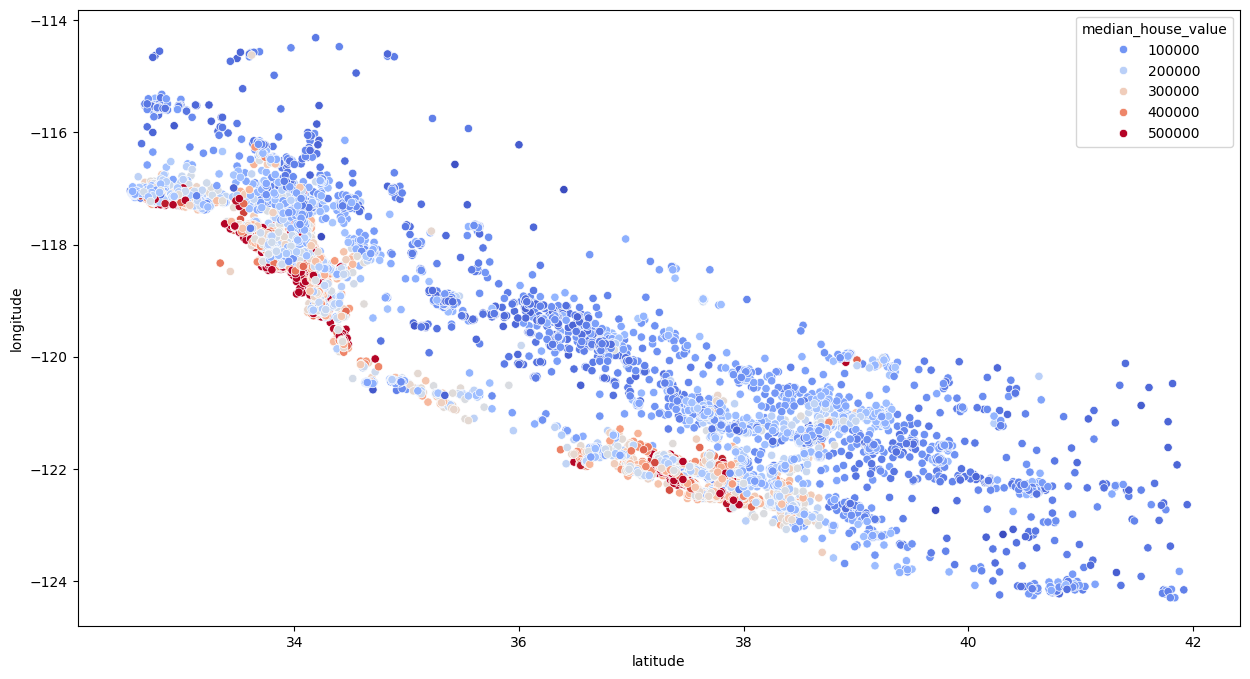

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [21]:
train_data["bedroom_ratio"]=train_data["total_bedrooms"]/ train_data["total_rooms"]
train_data["household_rooms"]= train_data["total_rooms"] / train_data["households"]

<Axes: >

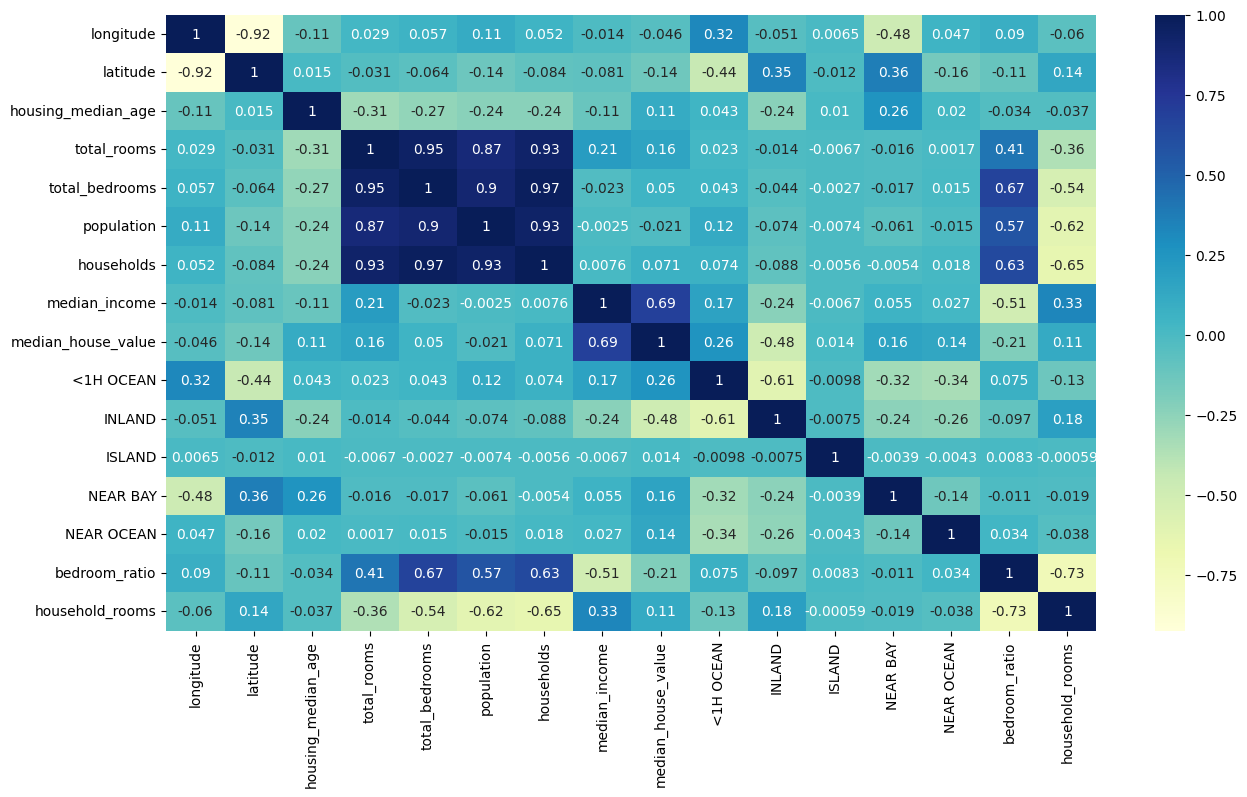

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train, y_train= train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [24]:
test_data= x_test.join(y_test)

test_data["total_rooms"]=np.log(test_data["total_rooms"]+ 1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+ 1)
test_data["population"]=np.log(test_data["population"]+ 1)
test_data["households"]=np.log(test_data["households"]+ 1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"]=test_data["total_bedrooms"]/ test_data["total_rooms"]
test_data["household_rooms"]= test_data["total_rooms"] / test_data["households"]
x_test, y_test= test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [25]:
x_test_s=scaler.transform(x_test)

In [26]:
reg.score(x_test_s,y_test)

0.68338353512069

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test_s,y_test)

0.8191888152053077

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
best_forest=grid_search.best_estimator_


In [33]:
best_forest.score(x_test_s,y_test)

0.8226247326581457

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train_s, y_train)

KNeighborsRegressor()

In [36]:
knn_regression_score = knn_regressor.score(x_test_s, y_test)
print("KNN Regression R^2 Score:", knn_regression_score)

KNN Regression R^2 Score: 0.722932682331898


In [37]:
y_train_class = pd.cut(y_train, bins=3, labels=['Low', 'Medium', 'High'])
y_test_class = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_s, y_train_class)


KNeighborsClassifier()

In [40]:
# Predict and evaluate
y_pred_class = knn_classifier.predict(x_test_s)
print("KNN Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
# print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
# print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))


KNN Classification Accuracy: 0.7609493516026425


In [41]:
from sklearn.svm import SVR

In [42]:
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(x_train_s, y_train)

SVR()

In [43]:
svm_regression_score = svm_regressor.score(x_test_s, y_test)
print("SVM Regression R^2 Score:", svm_regression_score)



SVM Regression R^2 Score: -0.04288939898466326


In [44]:
from sklearn.svm import SVC

In [45]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(x_train_s, y_train_class)

SVC()

In [46]:
y_pred_svm_class = svm_classifier.predict(x_test_s)
print("SVM Classification Accuracy:", accuracy_score(y_test_class, y_pred_svm_class))

SVM Classification Accuracy: 0.7930022021042329
